In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.linalg as linalg

import matplotlib.pyplot as plt

import warnings

# Computational Activity 4
Here we experiment with the Joukowski transformation and analyse flows resulting from various bodies placed in uniform flow

## Part one: The function

Consider the Joukowski transformation from the lecture

$$ z = \tau + \frac{k^2}{\tau}$$

In [2]:
def Joukowski(k,xi0,eta0):
    # calculate radius
    r=np.sqrt((k-xi0)**2+eta0**2);
    
    # create theta array for 2pi rotation
    theta=np.linspace(0,2*np.pi,101);
    
    # convert to xi and eta values
    xi=r*np.cos(theta);
    eta=r*np.sin(theta);
    
    # shift to centre
    xi=xi+xi0;
    eta=eta+eta0;
    
    # convert back to x and y
    x=xi+(k**2)*xi/(xi**2+eta**2);
    y=eta-(k**2)*eta/(xi**2+eta**2);
    
    return x,y

Plot this body for $(k,\xi_0,\eta_0)=(1,-1,1)$

In [3]:
k = 1

xi0 = -1
eta0 = 1

x0,y0 = Joukowski(k,xi0,eta0)

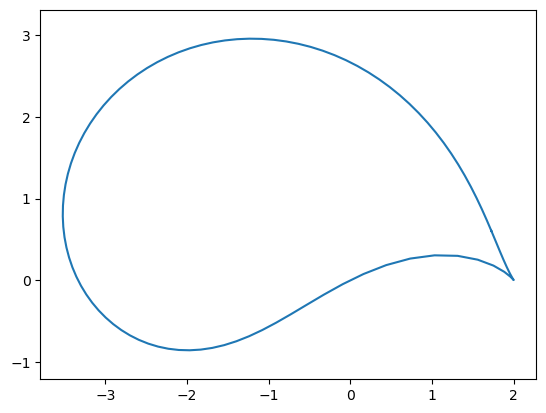

In [4]:
plt.plot(x0,y0)
plt.axis('equal');

## Part two: Calculate streamfunction
Complex potential for uniform flow around a circle
$$ w = c\bigg(\tau + \frac{a^2}{\tau-\tau_0}\bigg) $$

In [5]:
def Streamfunction(k,xi0,eta0,c,xi,eta):
    tau0 = xi0+eta0*1j
    a2=(k-xi0)**2+eta0**2
    disc = ((xi+eta*1j)**2-4*k**2)
    sqrt = disc**0.5

    tau = xi+eta*1j
    w = c*(tau+a2/(tau-tau0)) 
    
    #add mask for wing shape
    w = np.ma.masked_where(np.absolute(tau-tau0)<=np.sqrt(a2), w)
    Psi = np.imag(w)

    # convert back to x and y
    x=xi+(k**2)*xi/(xi**2+eta**2);
    y=eta-(k**2)*eta/(xi**2+eta**2);
    z = x+y*1j
    
    return Psi,z

In [6]:
x = np.linspace(-10,10,150)
y = np.linspace(-10,10,150)
X,Y = np.meshgrid(x,y)

c=1

Psi,z = Streamfunction(k,xi0,eta0,c,X,Y)

Calculate stagnation points using
$$ \frac{\mathrm{d}w}{\mathrm{d}\tau} = c - \frac{ca^2}{(\tau-\tau_0)^2}. $$
This implies
$$ \tau = \pm \;a + \tau_0. $$


In [7]:
a=((k-xi0)**2+eta0**2)**0.5
tau1 = a+xi0+eta0*1j
tau2 = -a+xi0+eta0*1j

Convert back to $z$-plane using Joukowski map

In [8]:
zs1 = tau1 + k**2/tau1
zs2 = tau2 + k**2/tau2

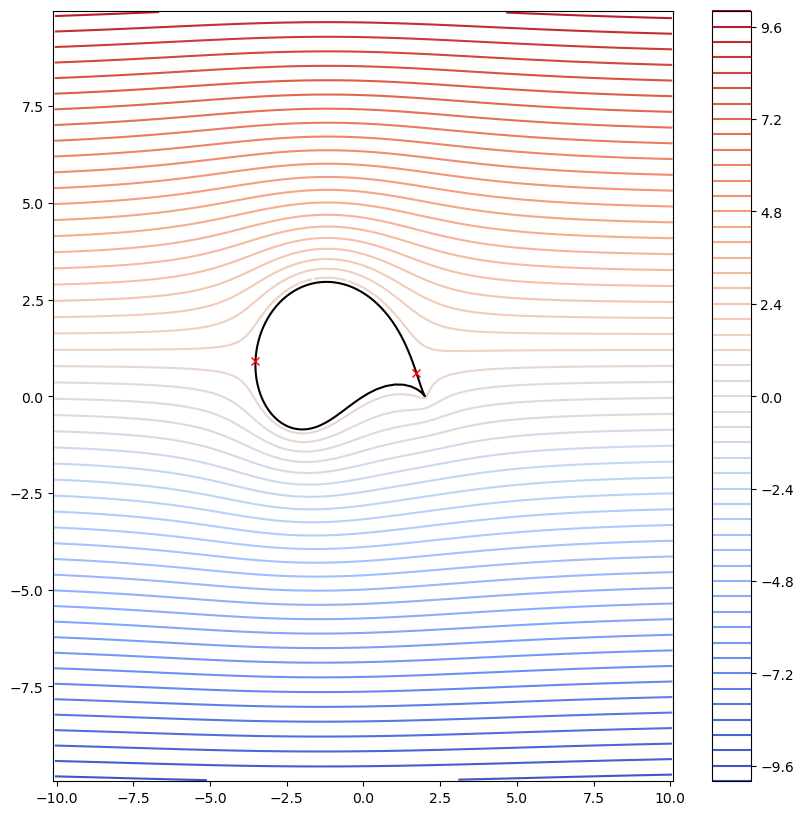

In [9]:
fig = plt.figure(figsize=(10,10))
p = plt.contour(np.real(z),np.imag(z),Psi,50,cmap='coolwarm')
plt.plot(x0,y0,'k')
plt.colorbar(p)
plt.plot([np.real(zs1),np.real(zs2)],[np.imag(zs1),np.imag(zs2)],'rx')

## Part three: Adding circulation
Due to the Kutta-Joukowski condition, the flow automatically adjusts itself to have a circulation component
$$  w = c\bigg(\tau + \frac{a^2}{\tau-\tau_0}\bigg) + \frac{i\Gamma}{2\pi}\ln|\tau-\tau_0|. $$
The circulation component $\Gamma$ should be chosen such that $\frac{dw}{d\tau}$ does not blow up at singularity. From the lectures we have
$$  \Gamma=\frac{4c\pi}{k-\xi_0}(k\eta_0-\xi_0\eta_0). $$

In [10]:
def Streamfunction_circ(k,xi0,eta0,c,xi,eta,Gamma):
    tau0 = xi0+eta0*1j
    a2=((k-xi0)**2+eta0**2)

    tau = xi+eta*1j
    
    w = c*(tau+a**2/(tau-tau0)) + Gamma*1j/(2*np.pi)*np.log(tau-tau0)
    
    #add mask for wing shape
    w = np.ma.masked_where(np.absolute(tau-tau0)<=np.sqrt(a2), w)
    Psi = np.imag(w)

    # convert back to x and y
    x=xi+(k**2)*xi/(xi**2+eta**2);
    y=eta-(k**2)*eta/(xi**2+eta**2);
    z = x+y*1j

    return Psi,z

In [11]:
Gamma = 4*np.pi*c*eta0

Psi,z = Streamfunction_circ(k,xi0,eta0,c,X,Y,Gamma)

Calculate stagnation points using
$$ \frac{\mathrm{d}w}{\mathrm{d}\tau} = c - \frac{ca^2}{(\tau-\tau_0)^2} + \frac{i \Gamma}{2\pi (\tau-\tau_0)}. $$
This implies
$$ \tau =  -\bigg(\frac{i \Gamma}{2\pi} \pm \sqrt{-\frac{\Gamma^2}{4\pi^2}+4c^2a^2}\bigg)\frac{1}{2c} + \tau_0. $$

In [12]:
a=((k-xi0)**2+eta0**2)**0.5
tau1 = -(1j*Gamma/(2*np.pi)+(-Gamma**2/(4*np.pi**2)+4*c**2*a**2)**0.5)/(2*c)+xi0+eta0*1j
tau2 = -(1j*Gamma/(2*np.pi)-(-Gamma**2/(4*np.pi**2)+4*c**2*a**2)**0.5)/(2*c)+xi0+eta0*1j

Convert back to $z$-plane using Joukowski map

In [13]:
zs1 = tau1 + k**2/tau1
zs2 = tau2 + k**2/tau2

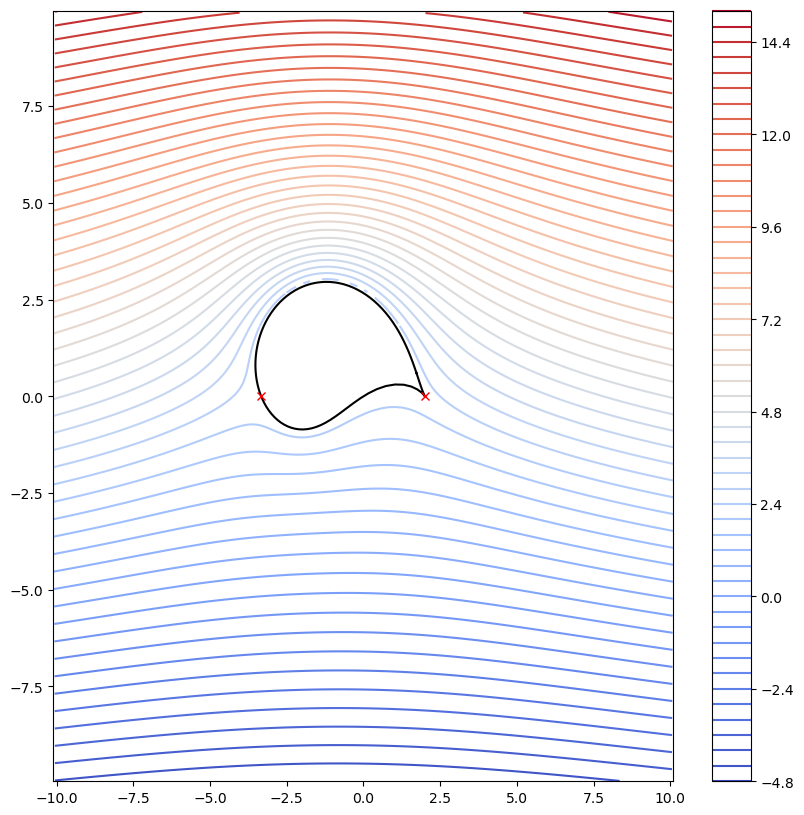

In [14]:
fig = plt.figure(figsize=(10,10))
p = plt.contour(np.real(z),np.imag(z),Psi,50,cmap='coolwarm')
plt.plot(x0,y0,'k')
plt.colorbar(p)
plt.plot([np.real(zs1),np.real(zs2)],[np.imag(zs1),np.imag(zs2)],'rx')

## Bonus: Modify angle of uniform flow
To add an angle of attack $\alpha$ to the uniform flow, we define the complex potential as
$$  w = c\bigg(\tau\mathrm{e}^{-i\alpha} + \frac{a^2}{(\tau-\tau_0)\mathrm{e}^{-i\alpha}}\bigg) + \frac{i\Gamma}{2\pi}\ln|\tau-\tau_0|\sin{\alpha}. $$

In [15]:
def Streamfunction_angle(k,xi0,eta0,c,xi,eta,Gamma,alpha):
    tau0 = xi0+eta0*1j
    a2=((k-xi0)**2+eta0**2)
    disc = ((xi+eta*1j)**2-4*k**2)
    sqrt = disc**0.5
    #tau = 1/2*((x+y*1j) - sqrt * (x < 0) + sqrt * (x >= 0) )

    tau = xi+eta*1j
    
    w = c*(tau*np.exp(-1j*alpha)+a**2/(np.exp(-1j*alpha)*(tau-tau0))) + Gamma*1j/(2*np.pi)*np.log(tau-tau0)#*np.sin(alpha)
    
    #add mask for wing shape
    w = np.ma.masked_where(np.absolute(tau-tau0)<=np.sqrt(a2), w)
    Psi = np.imag(w)

    # convert back to x and y
    x=xi+(k**2)*xi/(xi**2+eta**2);
    y=eta-(k**2)*eta/(xi**2+eta**2);
    z = x+y*1j
    
    #return Psi,tau
    return Psi,z

In [16]:
alpha = np.pi/4
Gamma = np.exp(1)*np.pi*k*(1+np.sqrt(5))

Psi,z = Streamfunction_angle(k,xi0,eta0,c,X,Y,Gamma,alpha)

Calculate stagnation points using
$$ \frac{\mathrm{d}w}{\mathrm{d}\tau} = c\mathrm{e}^{-i\alpha} - \frac{ca^2}{\mathrm{e}^{-i\alpha}(\tau-\tau_0)^2} + \frac{i \Gamma}{2\pi (\tau-\tau_0)}. $$
This implies
$$ \tau =  -\bigg(\frac{i \Gamma}{2\pi} \pm \sqrt{-\frac{\Gamma^2}{4\pi^2}+4c^2a^2}\bigg)\frac{1}{2c\mathrm{e}^{-i\alpha}} + \tau_0. $$

In [17]:
a=((k-xi0)**2+eta0**2)**0.5
tau1 = -(1j*Gamma/(2*np.pi)+(-Gamma**2/(4*np.pi**2)+4*c**2*a**2)**0.5)/(2*c*np.exp(-1j*alpha))+xi0+eta0*1j
tau2 = -(1j*Gamma/(2*np.pi)-(-Gamma**2/(4*np.pi**2)+4*c**2*a**2)**0.5)/(2*c*np.exp(-1j*alpha))+xi0+eta0*1j

Convert back to $z$-plane using Joukowski map

In [18]:
zs1 = tau1 + k**2/tau1
zs2 = tau2 + k**2/tau2

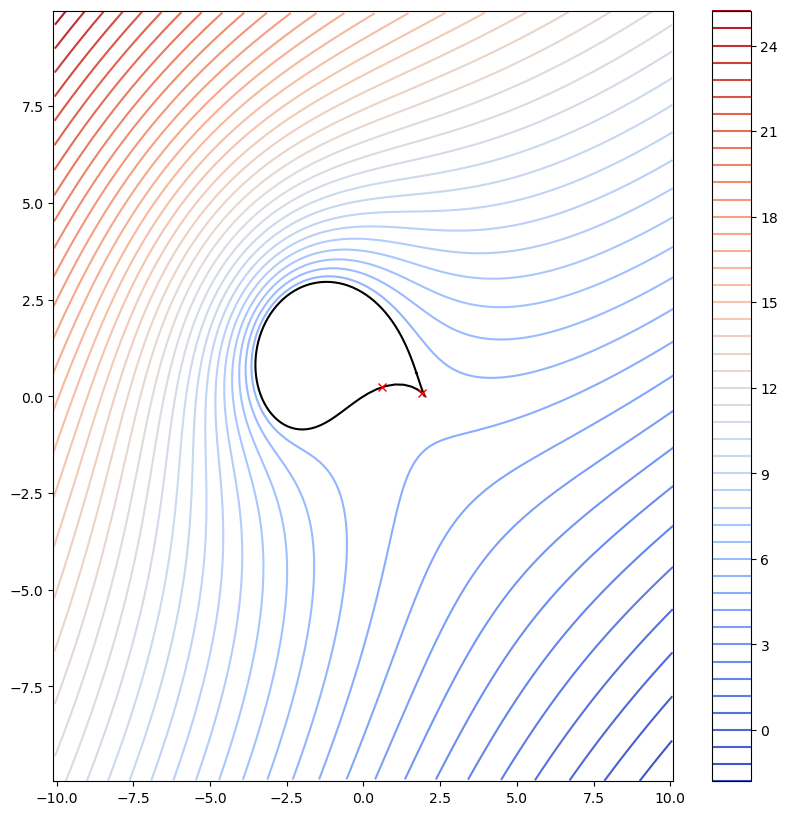

In [19]:
fig = plt.figure(figsize=(10,10))
p = plt.contour(np.real(z),np.imag(z),Psi,50,cmap='coolwarm')
plt.plot(x0,y0,'k')
plt.colorbar(p)
plt.plot([np.real(zs1),np.real(zs2)],[np.imag(zs1),np.imag(zs2)],'rx')